# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
 
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
load_boston = fetch_openml(data_id=531, as_frame=True, parser='pandas')

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Gather Data

[Source: Original research paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [2]:
boston_dataset = load_boston

In [3]:
type(boston_dataset)

sklearn.utils._bunch.Bunch

In [4]:
dir(boston_dataset)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [5]:
print(boston_dataset.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

## Data points and features

In [6]:
type(boston_dataset.data)

pandas.core.frame.DataFrame

In [7]:
boston_dataset.data.shape

(506, 13)

In [8]:
boston_dataset.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [9]:
# Actual prices in thousands (000)
np.array(boston_dataset.target)

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with Pandas 

In [10]:
data = pd.DataFrame(data=boston_dataset.data, dtype=np.float64, columns=boston_dataset.feature_names) #Force data types to float64
data['PRICE'] = boston_dataset.target


In [11]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Cleaning data - check for missing values

In [12]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar Charts

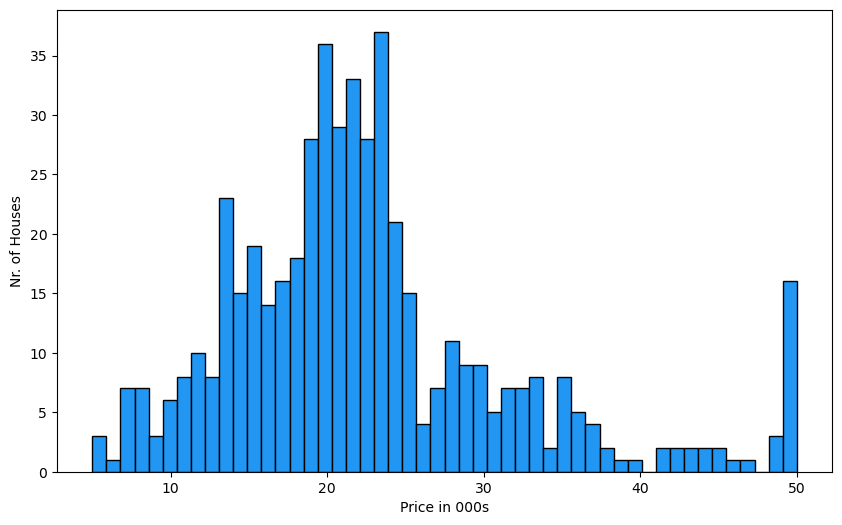

In [14]:
plt.figure(figsize=(10,6))

plt.hist(data.PRICE, bins=50, ec='black', color='#2196F3')
plt.xlabel("Price in 000s")
plt.ylabel("Nr. of Houses")
plt.show()

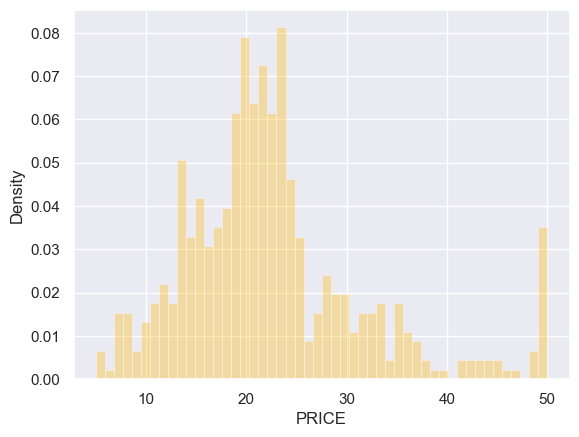

In [15]:
#sns.distplot(data.PRICE) # Deprecated
sns.set_theme()
sns.histplot(
    data.PRICE, kde=False,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
    bins=50, color="#fbc02d"
)
plt.show()

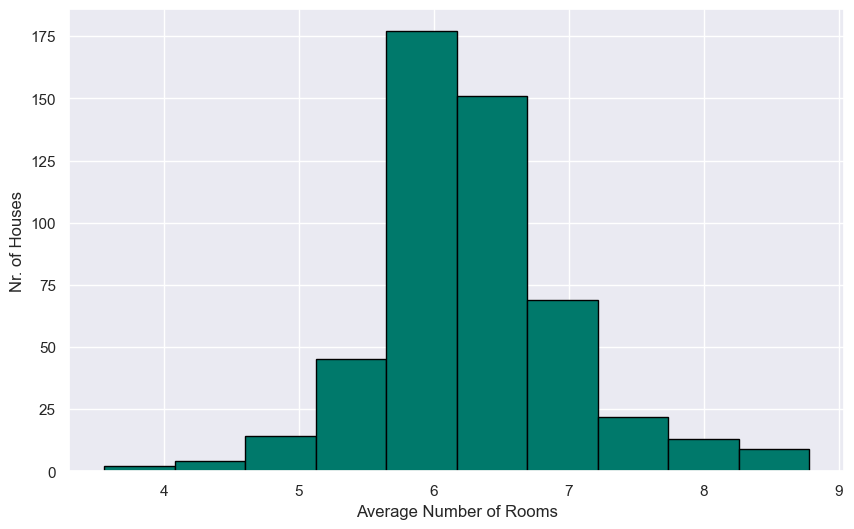

In [16]:
plt.figure(figsize=(10,6))

plt.hist(data.RM, ec='black', color='#00796b')
plt.xlabel("Average Number of Rooms")
plt.ylabel("Nr. of Houses")
plt.show()

In [17]:
data.RM.mean()

6.284634387351779

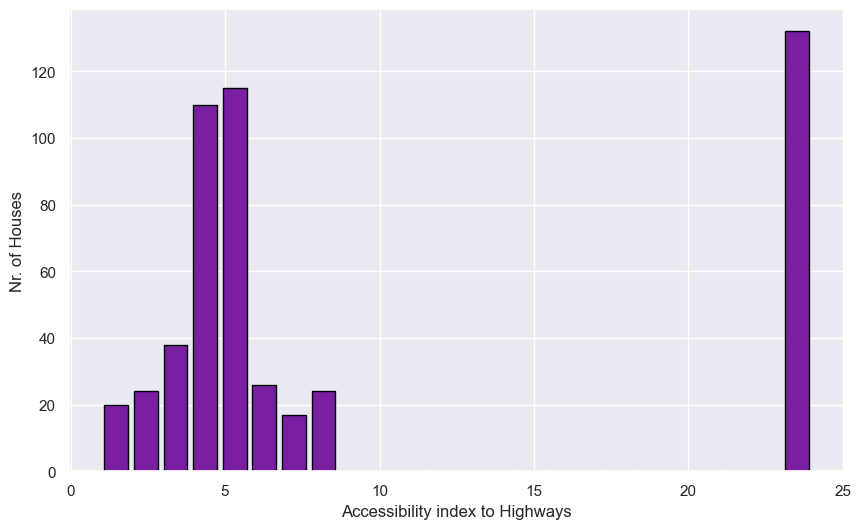

In [18]:
plt.figure(figsize=(10,6))

plt.hist(data.RAD, bins=24, ec='black', color='#7b1fa2', rwidth=0.8)
plt.xlabel("Accessibility index to Highways")
plt.ylabel("Nr. of Houses")
plt.show()

In [19]:
data.RAD.value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

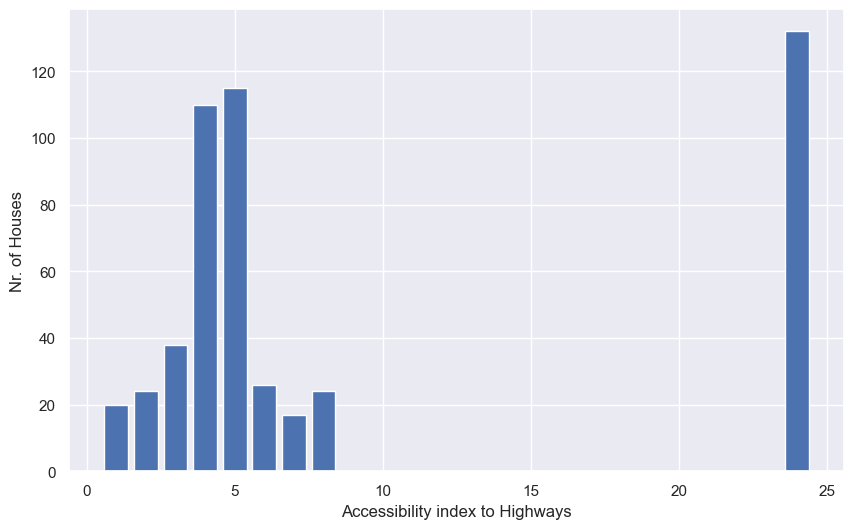

In [20]:
frequency = data.RAD.value_counts()
#type(frequency)
#frequency.index
#frequency.axes[0]

plt.figure(figsize=(10,6))
plt.xlabel("Accessibility index to Highways")
plt.ylabel("Nr. of Houses")
plt.bar(frequency.index, height=frequency)
plt.show()

In [21]:
data.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [22]:
data.PRICE.min()

5.0

In [23]:
data.PRICE.max()

50.0

In [24]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [25]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [26]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [27]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [28]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0$$

In [29]:
data.PRICE.corr(data.RM)

0.6953599470715393

In [30]:
data.PRICE.corr(data.PTRATIO)

-0.5077866855375616

In [31]:
data.corr() # Pearson Correlation Coefficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [32]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

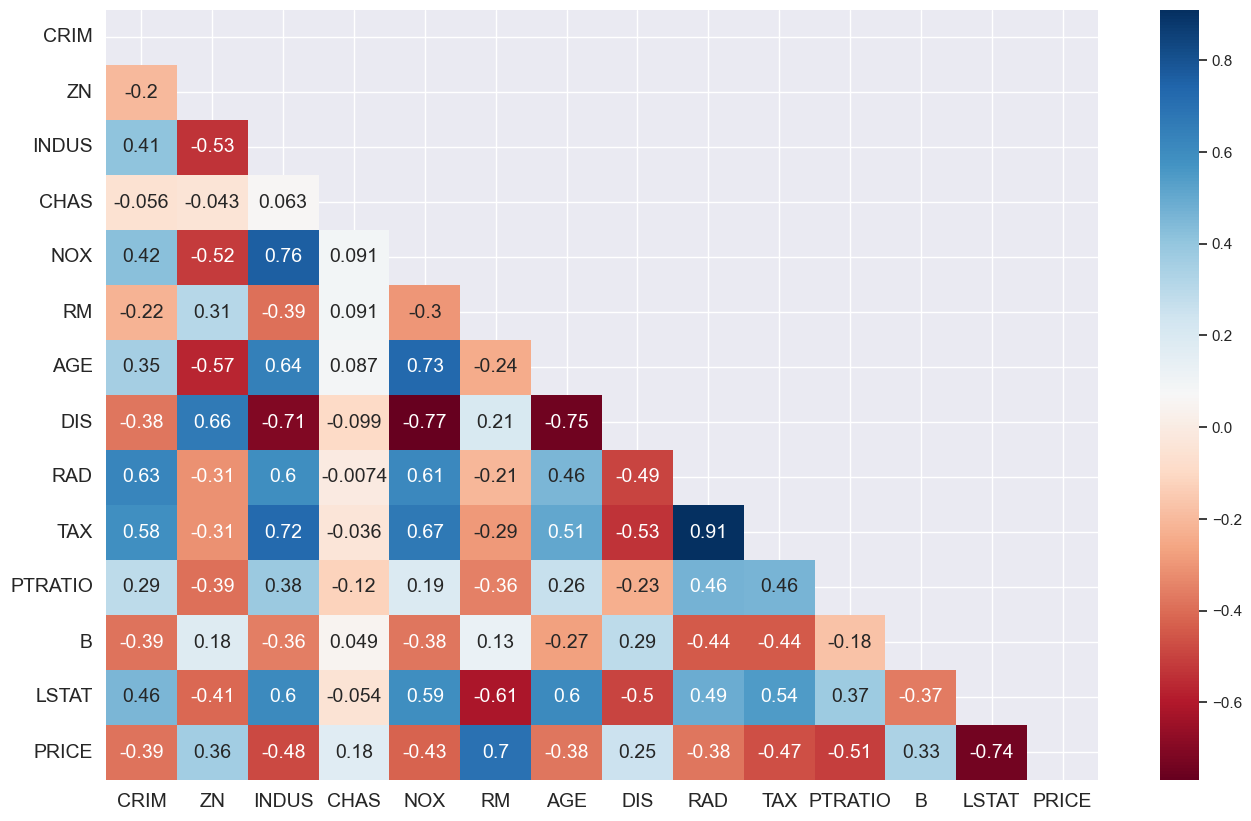

In [33]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14}, cmap="RdBu")
sns.set_style("white")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)
plt.show()

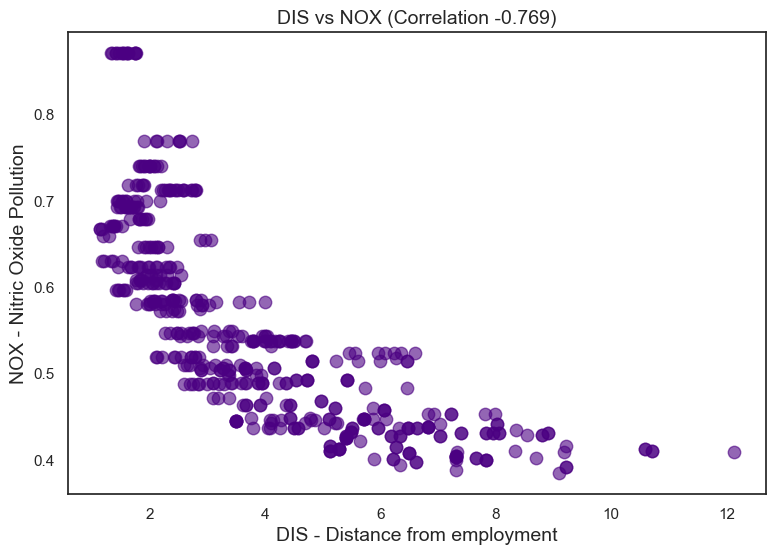

In [34]:
nox_dis_corr = data.NOX.corr(data.DIS)

plt.figure(figsize=(9,6))
plt.scatter(data.DIS, data.NOX, alpha=0.6, s=80, color="indigo")
plt.title(f"DIS vs NOX (Correlation {nox_dis_corr:.3f})", fontsize=14)
plt.xlabel("DIS - Distance from employment", fontsize=14)
plt.ylabel("NOX - Nitric Oxide Pollution", fontsize=14)
plt.show()

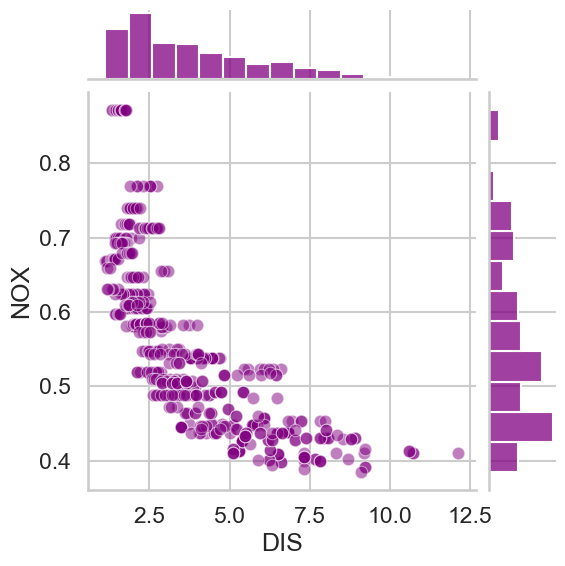

In [35]:
sns.set()
sns.set_context("talk")
sns.set_style("whitegrid")
sns.jointplot(x=data.DIS, y=data.NOX, color="purple", joint_kws={'alpha': 0.5})
plt.show()

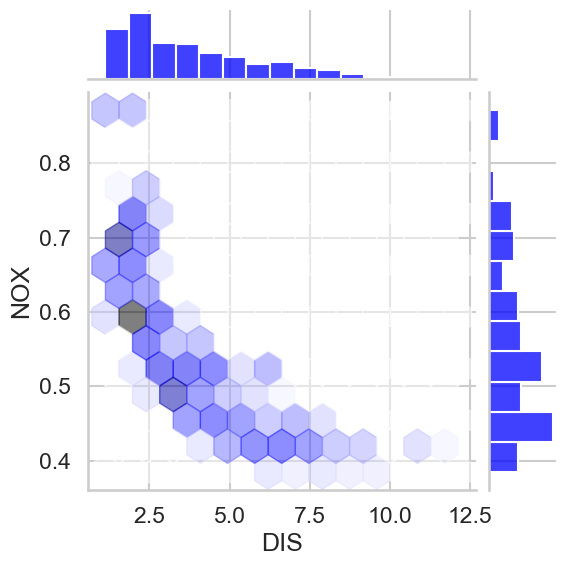

In [36]:
sns.set()
sns.set_context("talk")
sns.set_style("whitegrid")
sns.jointplot(x=data.DIS, y=data.NOX, color="blue", kind='hex', joint_kws={'alpha': 0.5})
plt.show()

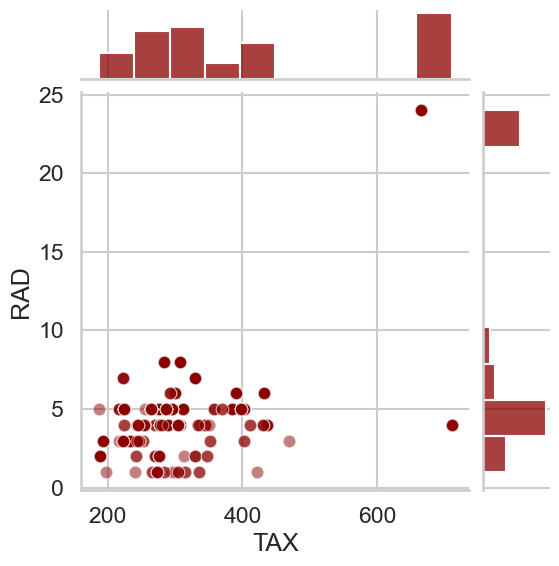

In [37]:
sns.set()
sns.set_context("talk")
sns.set_style("whitegrid")
sns.jointplot(x=data.TAX, y=data.RAD, color="darkred", joint_kws={'alpha': 0.5})
plt.show()

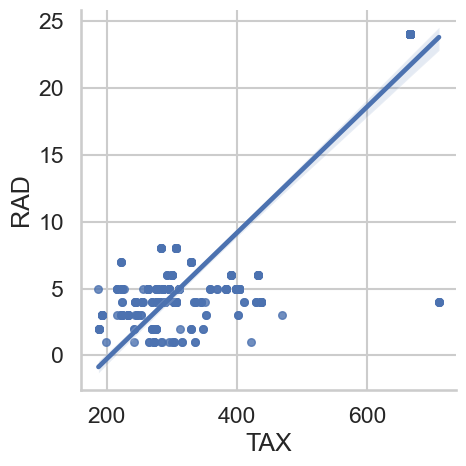

In [38]:
sns.lmplot(x='TAX', y='RAD', data=data, scatter_kws={'s':30})
plt.show()

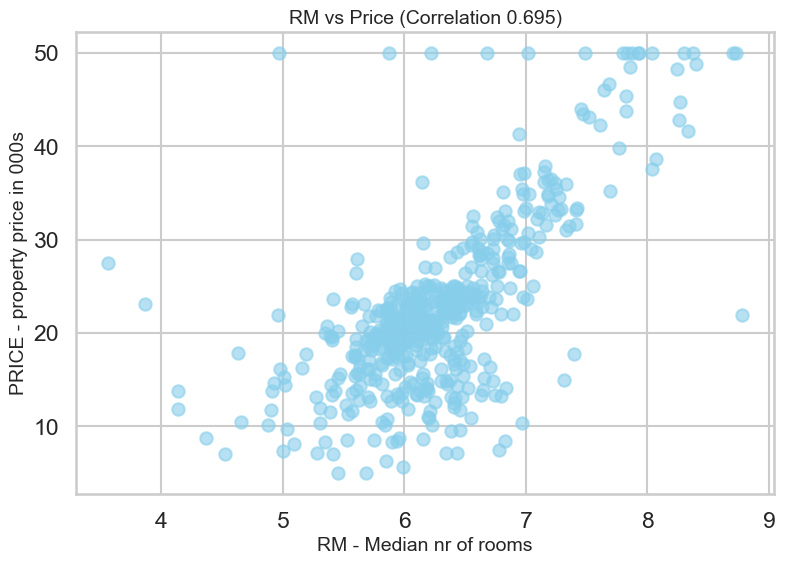

In [39]:
rm_tgt_corr = data.RM.corr(data.PRICE)

plt.figure(figsize=(9,6))
plt.scatter(data.RM, data.PRICE, alpha=0.6, s=80, color="skyblue")
plt.title(f"RM vs Price (Correlation {rm_tgt_corr:.3f})", fontsize=14)
plt.xlabel("RM - Median nr of rooms", fontsize=14)
plt.ylabel("PRICE - property price in 000s", fontsize=14)
plt.show()

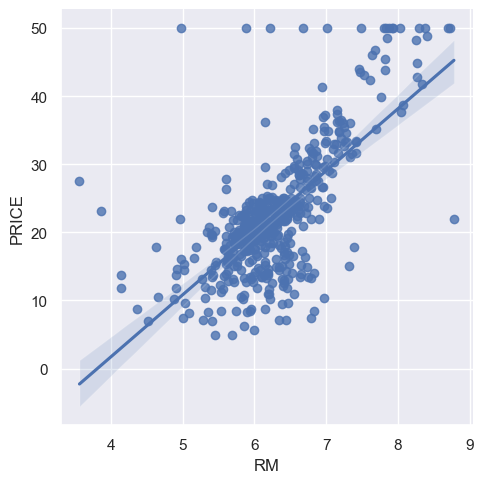

In [40]:
sns.set()
sns.lmplot(x='RM', y='PRICE', data=data)
plt.show()

In [41]:
# %%time

# sns.pairplot(data)
# plt.show()

In [42]:
# %%time

# sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
# plt.show()

## Training & Test Dataset Split

In [43]:
prices = data.PRICE
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# % of training set
len(X_train)/len(features)

0.7984189723320159

## Multivariable Regression

In [44]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print("Intercept", regr.intercept_)
print('Training data r-squared:', regr.score(X_train, y_train))
print('Testing data r-squared:', regr.score(X_test, y_test))
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=["coef"])

Intercept 36.533051382824596
Training data r-squared: 0.750121534530608
Testing data r-squared: 0.6709339839115644


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Data Transformations

In [45]:
data.PRICE.skew()

1.1080984082549072

In [46]:
y_log = np.log(data.PRICE)
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [47]:
y_log.skew()

-0.33032129530987864

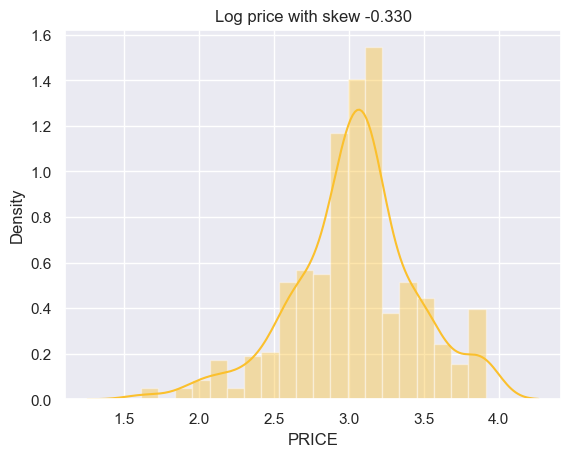

In [48]:
sns.histplot(
    y_log, kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
    bins=20, color="#fbc02d"
)

plt.title(f"Log price with skew {y_log.skew():.3f}")
plt.show()

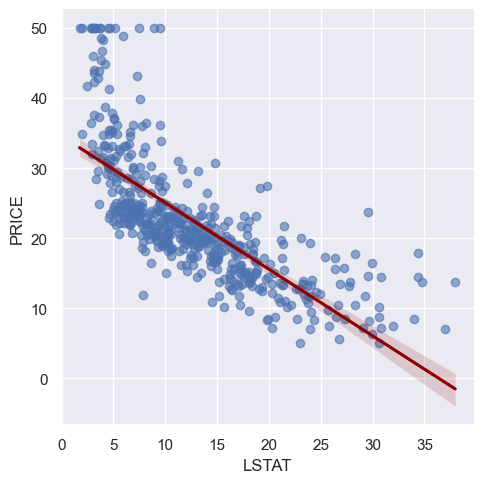

In [49]:
sns.lmplot(x="LSTAT", y="PRICE", data=data, scatter_kws={'alpha': 0.6}, line_kws={'color':'darkred'})
plt.show()

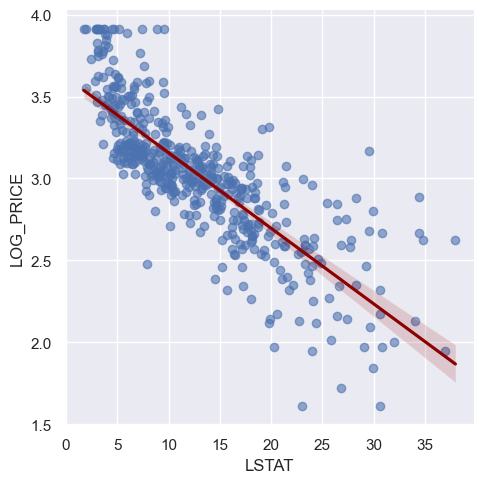

In [50]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x="LSTAT", y="LOG_PRICE", data=transformed_data, scatter_kws={'alpha': 0.6}, line_kws={'color':'darkred'})
plt.show()

## Regression using log prices

In [51]:
prices = np.log(data.PRICE)
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print("Intercept", regr.intercept_)
print('Training data r-squared:', regr.score(X_train, y_train))
print('Testing data r-squared:', regr.score(X_test, y_test))
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=["coef"])

Intercept 4.059943871775193
Training data r-squared: 0.7930234826697583
Testing data r-squared: 0.7446922306260727


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [52]:
# Charles River Property Premium
# Reverse log calculation

np.e**0.080331

1.0836456950439142

## p values 6 Evaluating Coefficients

In [53]:
X_include_const = sm.add_constant(X_train)

model= sm.OLS(y_train, X_include_const) # Ordinary Least Squares -> Linear Regression Model
results = model.fit()

#results.params
#results.pvalues

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicollinearity

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12} LSTAT $$

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^2)} $$

Multicolinearity problem: VIF > 10

In [54]:
variance_inflation_factor(exog=X_include_const, exog_idx=1)

1.7145250443932492

In [55]:
nr_columns = X_include_const.shape[1]

In [56]:
vif = [variance_inflation_factor(exog=X_include_const, exog_idx=i) for i in range(nr_columns)]

pd.DataFrame({'coef_name': X_include_const.columns, 'vif': np.around(vif, 2)})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


In [57]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Model Simplication & BIC (Baysian Information Criteria)

In [58]:
# Original model with log prices and all features

X_include_const = sm.add_constant(X_train)

model= sm.OLS(y_train, X_include_const) # Ordinary Least Squares -> Linear Regression Model
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print("BIC is", results.bic)
print("R-squared is", results.rsquared)

BIC is -139.74997769478898
R-squared is 0.7930234826697584


In [59]:
# Reduced model # 1 excluding INDUS

X_include_const = sm.add_constant(X_train)
X_include_const = X_include_const.drop(['INDUS'], axis=1)

model= sm.OLS(y_train, X_include_const) # Ordinary Least Squares -> Linear Regression Model
results = model.fit()
coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print("BIC is", results.bic)
print("R-squared is", results.rsquared)

BIC is -145.14508855591163
R-squared is 0.7927126289415163


In [60]:
# Reduced model # 2 excluding INDUS and AGE

X_include_const = sm.add_constant(X_train)
X_include_const = X_include_const.drop(['INDUS', 'AGE'], axis=1)

model= sm.OLS(y_train, X_include_const) # Ordinary Least Squares -> Linear Regression Model
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print("BIC is", results.bic)
print("R-squared is", results.rsquared)

BIC is -149.49934294224678
R-squared is 0.7918657661852815


In [61]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

,coef,p-value,coef,p-value,coef,p-value
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## Residuals & Residual Plots

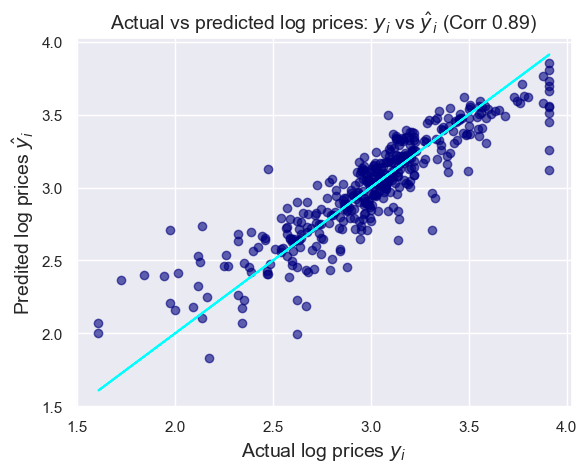

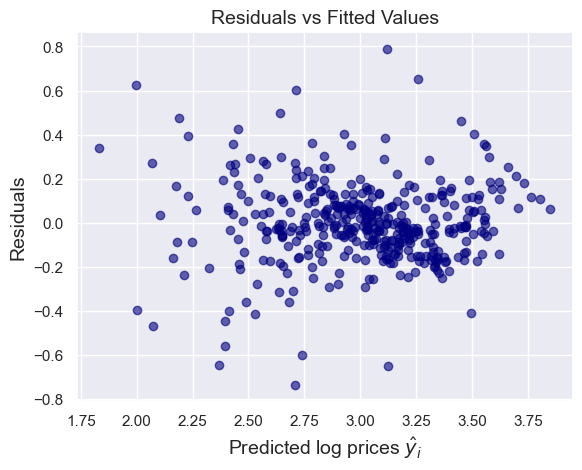

In [62]:
# Modified model: transformed (using log prices) & simplified (dropping two features)

prices = np.log(data.PRICE)
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using Statsmodel
X_include_const = sm.add_constant(X_train)
model= sm.OLS(y_train, X_include_const)
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues
# results.resid

# Graph of Actual vs Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.title(f"Actual vs predicted log prices: $y_i$ vs $\hat y_i$ (Corr {corr})", fontsize=14)
plt.xlabel("Actual log prices $y _i$", fontsize=14)
plt.ylabel("Predited log prices $\hat y _i$", fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.title("Residuals vs Fitted Values", fontsize=14)
plt.xlabel("Predicted log prices $\hat y _i$", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

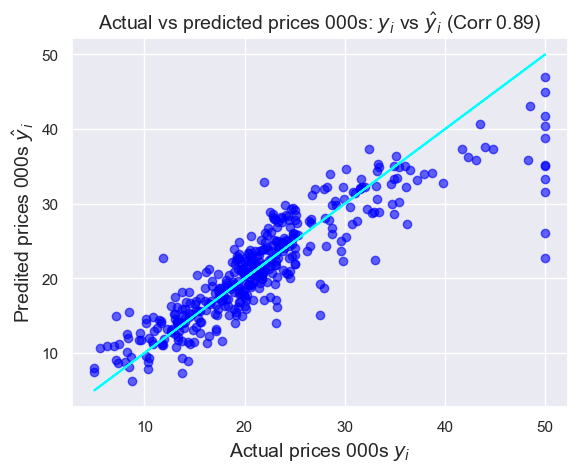

In [63]:
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.title(f"Actual vs predicted prices 000s: $y_i$ vs $\hat y_i$ (Corr {corr})", fontsize=14)
plt.xlabel("Actual prices 000s $y _i$", fontsize=14)
plt.ylabel("Predited prices 000s $\hat y _i$", fontsize=14)
plt.show()

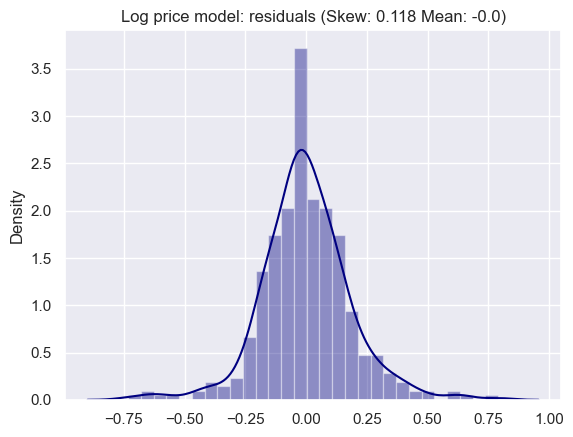

In [64]:
# Distribution of Residuals (log price) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.histplot(
    results.resid, kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
    color="navy"
)

plt.title(f"Log price model: residuals (Skew: {resid_skew} Mean: {resid_mean})")
plt.show()

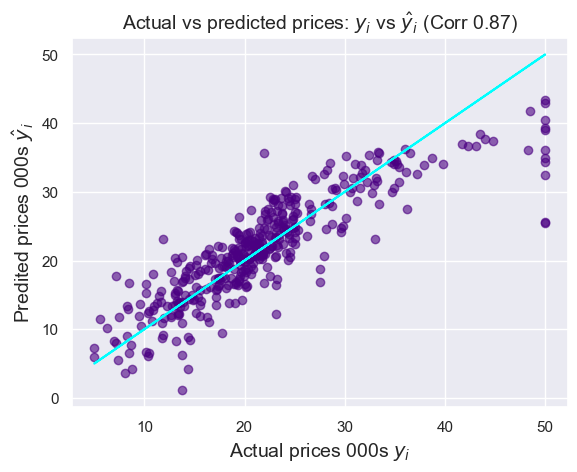

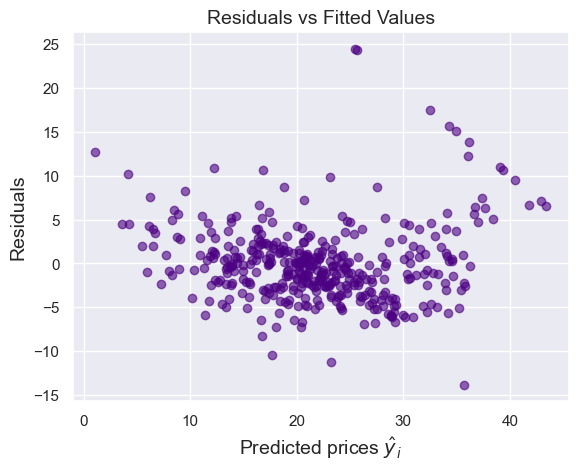

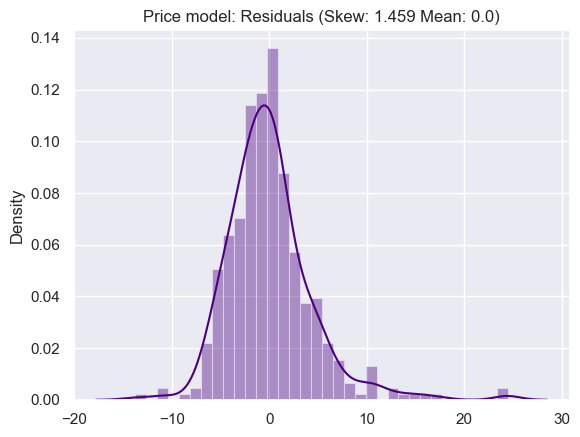

In [65]:
# Original model: normal prices and all features

prices = data.PRICE
features = data.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using Statsmodel
X_include_const = sm.add_constant(X_train)
model= sm.OLS(y_train, X_include_const)
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues
# results.resid

# Graph of Actual vs Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.title(f"Actual vs predicted prices: $y_i$ vs $\hat y_i$ (Corr {corr})", fontsize=14)
plt.xlabel("Actual prices 000s $y _i$", fontsize=14)
plt.ylabel("Predited prices 000s $\hat y _i$", fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)

plt.title("Residuals vs Fitted Values", fontsize=14)
plt.xlabel("Predicted prices $\hat y _i$", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.show()

# Distribution of Residuals (log price) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.histplot(
    results.resid, kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
    color="indigo"
)

plt.title(f"Price model: Residuals (Skew: {resid_skew} Mean: {resid_mean})")
plt.show()

# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

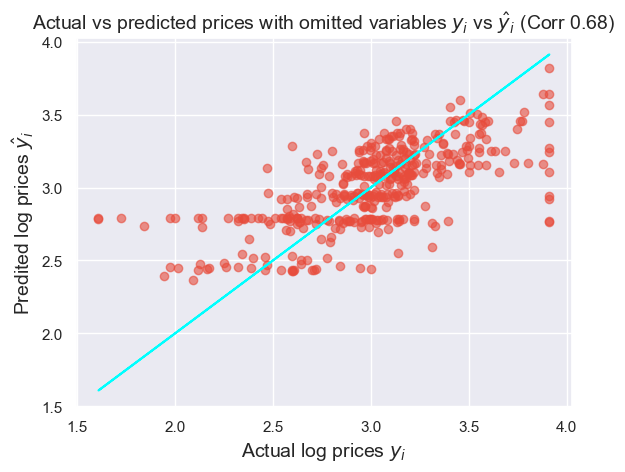

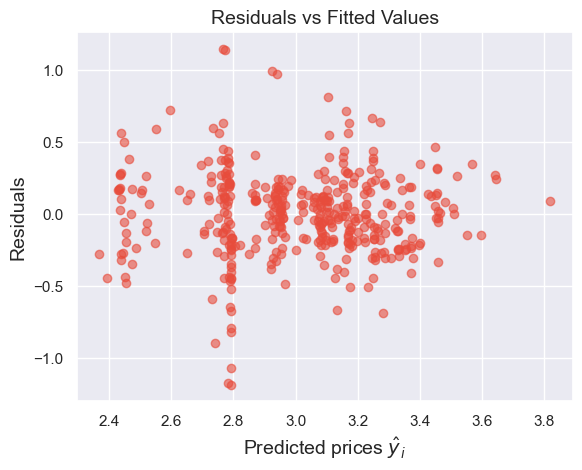

In [66]:
# Model Ommiting Key Features using log prices

prices = np.log(data.PRICE)
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

# Using Statsmodel
X_include_const = sm.add_constant(X_train)
model= sm.OLS(y_train, X_include_const)
results = model.fit()

# Residuals
# residuals = y_train - results.fittedvalues
# results.resid

# Graph of Actual vs Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.title(f"Actual vs predicted prices with omitted variables $y_i$ vs $\hat y_i$ (Corr {corr})", fontsize=14)
plt.xlabel("Actual log prices $y _i$", fontsize=14)
plt.ylabel("Predited log prices $\hat y _i$", fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.title("Residuals vs Fitted Values", fontsize=14)
plt.xlabel("Predicted prices $\hat y _i$", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.show()

# Mean Squared Error & R-Squared
ommited_var_mse = round(results.mse_resid, 3)
ommited_var_rsquared = round(results.rsquared, 3)

In [67]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, ommited_var_rsquared], 
              'MSE': [reduced_log_mse, full_normal_mse, ommited_var_mse], 
              'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, ommited_var_mse])}, 
              index=['Reduced Log Model', 'Full Normal Price Model', 'Ommited Var Model'])

,R-Squared,MSE,RMSE
Reduced Log Model,0.792,0.035,0.187083
Full Normal Price Model,0.750,19.921,4.463295
Ommited Var Model,0.460,0.090,0.300000


In [68]:
# RMSE -> Root Mean Squared Error. 1 Standard deviation of the residuals distribution.

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)

print("The upper bound for a 30000$ estimate in log prices for a 95% prediction interval is", upper_bound)
print("The upper bound for a 30000$ estimate in normal prices for a 95% prediction interval is $", np.e**upper_bound * 1000)

print("The lower bound for a 30000$ estimate in log prices for a 95% prediction interval is", lower_bound)
print("The lower bound for a 30000$ estimate in normal prices for a 95% prediction interval is $", np.e**lower_bound * 1000)

The upper bound for a 30000$ estimate in log prices for a 95% prediction interval is 3.7753631203395495
The upper bound for a 30000$ estimate in normal prices for a 95% prediction interval is $ 43613.34233239937
The lower bound for a 30000$ estimate in log prices for a 95% prediction interval is 3.0270316429847615
The lower bound for a 30000$ estimate in normal prices for a 95% prediction interval is $ 20635.886906824155
